# Asia Pacific Bids Histogram
 Histograma aproximado con Presto

In [14]:
from stats_util import get_presto_bidrate_histogram, get_stats
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import math

x_silver, y_silver = get_presto_bidrate_histogram(24,"20181220","20181225")
x, y = get_presto_bidrate_histogram(24,"20181213","20181218")
"done"

'done'

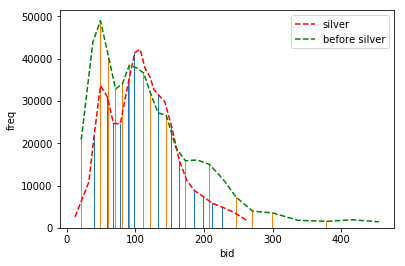

In [15]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

plt.bar(x_silver, y_silver)
plt.plot(x_silver, y_silver,'r--', label="silver")

plt.bar(x, y)
plt.plot(x, y,'g--', label="before silver")

plt.xlabel('bid')
plt.ylabel('freq')
plt.legend()
plt.show()


In [17]:
s_mean, s_var= get_stats(x_silver, y_silver)
mean, var= get_stats(x, y)

"silver"+ str( (s_mean,s_var) ) +"  no_silver"+str((mean,var)) 
                                                                                 
                                                                                 

'silver(108.6679483864993, 44.69097646762796)  no_silver(107.87292400943733, 65.83243755653598)'

  ### Use Chi Square Test
Determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

H0: Both distribution frequencies of Non-Silver and Silver are equals
H1: Samples form Silver and Non-Silver belongs to two diferent distributions

PD: try  Kolmogorov–Smirnov test 


In [13]:
from scipy import stats


dice = np.array([np.array(y)/1000,np.array(y_silver)/1000])
stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex


(78.66351658115656,
 2.674098571444265e-12,
 11,
 array([[64.88281694, 64.69180718, 61.98616886, 64.16828042, 57.74895225,
         54.00826101, 52.13816541, 41.22810767, 27.63691286, 15.22477832,
          9.02996163,  5.62278745],
        [64.87618306, 64.68519282, 61.97983114, 64.16171958, 57.74304775,
         54.00273899, 52.13283459, 41.22389233, 27.63408714, 15.22322168,
          9.02903837,  5.62221255]]))